In [1]:
import numpy as np
import pandas as pd 
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from tqdm import tqdm

https://github.com/aryancodify/Clustering/tree/masterm

In [2]:
carcass_df = pd.read_csv('CarcassComplete.csv')

In [3]:
carcass_df.dtypes

Killnumber              int64
KillDate               object
AnimalType              int64
Class                   int64
Fat                     int64
Weight                float64
WeightWarm            float64
ClassificationTime     object
AgeMonths               int64
Remark                 object
PartCassation         float64
dtype: object

In [4]:
carcass_df

,Killnumber,KillDate,AnimalType,Class,Fat,Weight,WeightWarm,ClassificationTime,AgeMonths,Remark,PartCassation
0,21508,2020-11-15,222,6,6,354.555,361.791,2020-11-15 16:20:21,18,457\n590,NaN
1,21508,2021-02-01,216,4,6,249.636,254.701,2021-02-01 13:57:25,17,77\n338\n590\n814,NaN
2,21508,2021-04-17,222,8,4,323.338,329.954,2021-04-17 13:40:17,13,466,NaN
3,21508,2021-07-03,216,8,8,322.925,329.540,2021-07-03 16:04:26,24,339\n387\n588\n703,NaN
4,21508,2021-09-05,219,5,7,324.372,330.987,2021-09-05 15:43:20,17,339\n590,NaN
...,...,...,...,...,...,...,...,...,...,...,...
74751,21507,2021-04-17,222,8,5,253.254,258.422,2021-04-17 13:39:06,13,117\n466,NaN
74752,21507,2021-11-09,224,7,6,357.553,364.892,2021-11-09 13:41:08,29,113\n589,NaN
74753,21508,2020-03-21,218,3,2,263.798,269.173,2020-03-21 12:00:55,41,77\n338\n589,NaN
74754,21508,2020-06-17,216,5,8,238.472,243.330,2020-06-17 13:33:05,25,339\n590,NaN


In [5]:
# Removing data not usable in clustering 
carcass_df = carcass_df.drop(['Killnumber', 'KillDate', 'WeightWarm', 'ClassificationTime', 'PartCassation'], axis=1)

In [5]:
carcass_df.shape

(74756, 11)

In [6]:
carcass_df = carcass_df[carcass_df.AgeMonths != 0]
carcass_df.shape

(74549, 11)

In [8]:
carcass_df.dtypes

AnimalType      int64
Class           int64
Fat             int64
Weight        float64
AgeMonths       int64
Remark         object
dtype: object

In [9]:
# Normalizing the numerical data 
carcass_df_norm = carcass_df.copy()
carcass_df_norm[['Weight', 'AgeMonths']] = preprocessing.normalize(carcass_df[['Weight', 'AgeMonths']])
carcass_df_norm

,AnimalType,Class,Fat,Weight,AgeMonths,Remark
0,222,6,6,0.998714,0.050703,457\n590
1,216,4,6,0.997689,0.067942,77\n338\n590\n814
2,222,8,4,0.999193,0.040173,466
3,216,8,8,0.997250,0.074116,339\n387\n588\n703
4,219,5,7,0.998629,0.052337,339\n590
...,...,...,...,...,...,...
74751,222,8,5,0.998685,0.051264,117\n466
74752,224,7,6,0.996727,0.080841,113\n589
74753,218,3,2,0.988137,0.153578,77\n338\n589
74754,216,5,8,0.994550,0.104263,339\n590


In [10]:
# Converting the dataset into matrix
carcass_matrix= carcass_df_norm.to_numpy()
print(carcass_matrix)

[[222 6 6 0.9987137977322106 0.05070256620039145 '457\n590']
 [216 4 6 0.9976892865654932 0.06794179473959439 '77\n338\n590\n814']
 [222 8 4 0.9991927332247287 0.04017314863060164 '466']
 ...
 [218 3 2 0.9881365116342831 0.15357810512970382 '77\n338\n589']
 [216 5 8 0.9945497878713522 0.10426274236297679 '339\n590']
 [219 7 9 0.9985918427323711 0.053050274536211174 '340\n589']]


Done with cluster n: 1 having cost: 1773.6527026274114
Done with cluster n: 2 having cost: 1597.2069259825826
Done with cluster n: 3 having cost: 1446.1763044144848
Done with cluster n: 4 having cost: 1376.0322311833859
Done with cluster n: 5 having cost: 1338.5951293227088
Done with cluster n: 6 having cost: 1271.885880366116
Done with cluster n: 7 having cost: 1262.7481035303153
Done with cluster n: 8 having cost: 1219.5019198199907
Done with cluster n: 9 having cost: 1169.959720342045
Done with cluster n: 10 having cost: 1151.6706865797846
Done with cluster n: 11 having cost: 1101.696437787019
Done with cluster n: 12 having cost: 1091.6788992605216
Done with cluster n: 13 having cost: 1062.21777681862
Done with cluster n: 14 having cost: 1065.5783394670875
Done with cluster n: 15 having cost: 1029.1842201454558
Done with cluster n: 16 having cost: 1028.831541501171
Done with cluster n: 17 having cost: 1024.1761964721923
Done with cluster n: 18 having cost: 991.5569647894549
Done wit

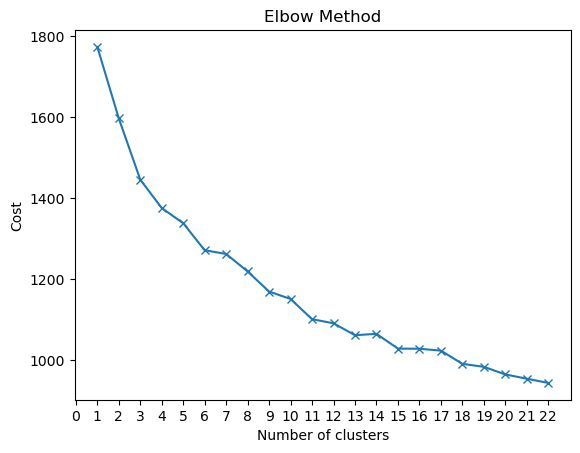

In [11]:
#Choosing optimal K 
cost = []
K = range(1,23)
for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao')
    kproto.fit_predict(carcass_matrix, categorical=[0,1,2,5])
    cost.append(kproto.cost_)
    print(f"Done with cluster n: {k} having cost: {kproto.cost_}")
plt.plot(K, cost, marker= "x")
plt.xlabel('Number of clusters')
plt.xticks(np.arange(23))
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.savefig("elbow_method.png")
plt.show()

In [12]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=11, init='Cao')
clusters = kproto.fit_predict(carcass_matrix, categorical=[0,1,2,5])

# Checking the cost of the clusters created.
kproto.cost_

1107.8835001310188

In [13]:
print(kproto.cluster_centroids_)

[['0.9981704477339227' '0.05843894089890775' '222' '7' '6' '589']
 ['0.9990227146858516' '0.04319376662087917' '222' '8' '5' '590']
 ['0.9986468333996986' '0.04917404735951357' '222' '5' '7' '588']
 ['0.9977664049744075' '0.06514333529560802' '216' '9' '8' '340\n589']
 ['0.9958923120835336' '0.08804146603627641' '216' '6' '5' '338\n589']
 ['0.9915919716458362' '0.12341834156679986' '218' '4' '4' '338\n589']
 ['0.9963512292847538' '0.08275673673261738' '216' '5' '6' '339\n589']
 ['0.9992604352127057' '0.03736288953034566' '222' '10' '6' '589']
 ['0.9985145952004781' '0.05268308530897796' '222' '5' '5' '589']
 ['0.9983889909095474' '0.054122238559144116' '222' '8' '7' '589']
 ['0.9985168554809809' '0.05242447232562473' '222' '6' '6' '590']]


In [15]:
# Adding the predicted clusters to the main dataset
carcass_df['Cluster_id'] = clusters
carcass_df

,AnimalType,Class,Fat,Weight,AgeMonths,Remark,Cluster_id
0,222,6,6,354.555,18,457\n590,10
1,216,4,6,249.636,17,77\n338\n590\n814,6
2,222,8,4,323.338,13,466,1
3,216,8,8,322.925,24,339\n387\n588\n703,3
4,219,5,7,324.372,17,339\n590,2
...,...,...,...,...,...,...,...
74751,222,8,5,253.254,13,117\n466,1
74752,224,7,6,357.553,29,113\n589,0
74753,218,3,2,263.798,41,77\n338\n589,5
74754,216,5,8,238.472,25,339\n590,6


In [16]:
print(carcass_df["Cluster_id"].value_counts().to_string())

Cluster_id
7     10881
3      9870
8      7435
1      6859
6      6499
10     6014
0      5907
5      5700
9      5682
2      5410
4      4292


In [21]:
palette = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#fdbf6f", "#ff00ff", "#ff7f00", "#cab2d6", "#6a3d9a", "#ffff99", "#b15928"]

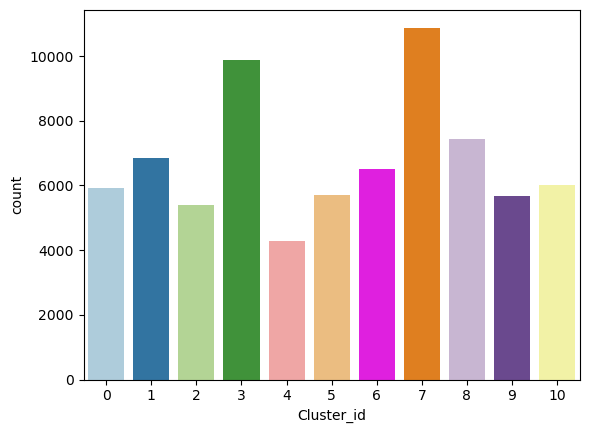

In [22]:
cluster_df = pd.DataFrame(carcass_df['Cluster_id'].value_counts())
cluster_bar = sns.barplot(x=cluster_df.index, y=cluster_df['count'], palette=palette)
plt.savefig("cluster_distrobution.png")

C:\Users\olljo\AppData\Local\Temp\ipykernel_11128\1909832772.py:1: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  graph = sns.catplot(data=carcass_df, x='Weight', y='AgeMonths', hue='Cluster_id', palette=palette, s=40)
C:\Users\olljo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\olljo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


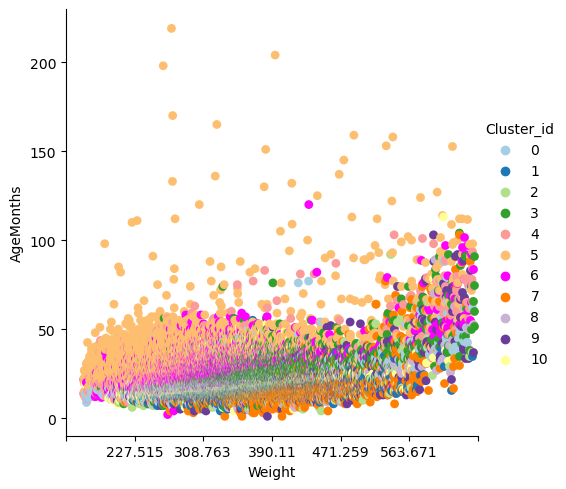

In [23]:
graph = sns.catplot(data=carcass_df, x='Weight', y='AgeMonths', hue='Cluster_id', palette=palette, s=40)
plt.xticks(np.arange(-100, 2500, step=400))
plt.savefig("cluster_age_weight.png")
plt.show(graph)

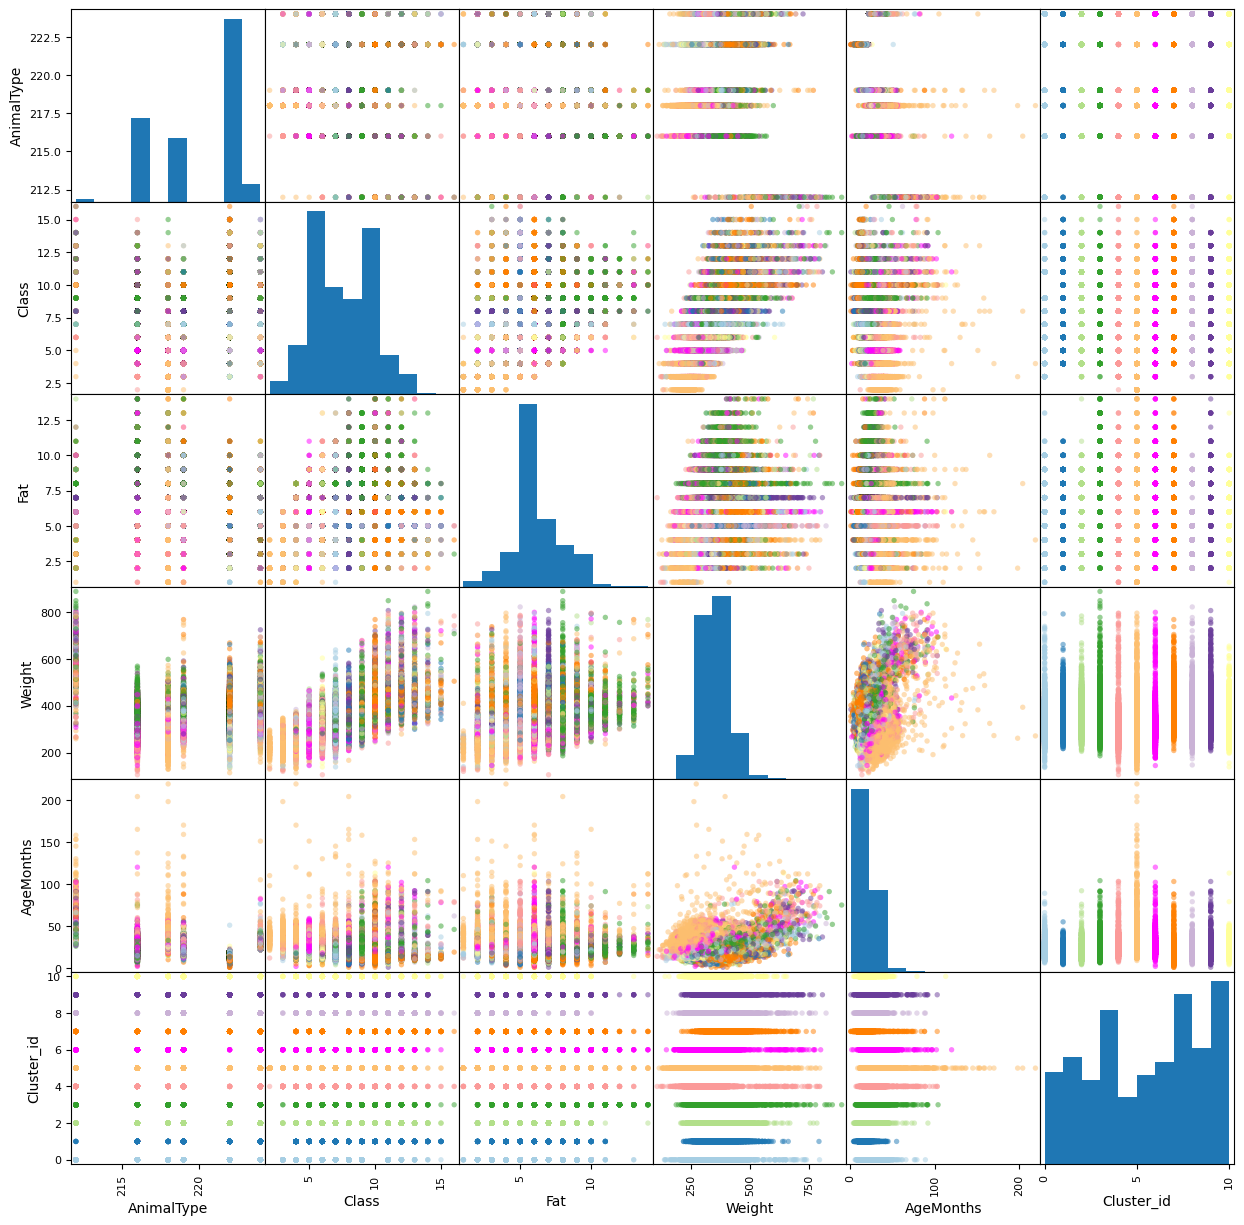

In [25]:
colormap = np.array(palette)
visual_2 = pd.plotting.scatter_matrix(carcass_df, figsize = [15,15], \
                                      c = colormap[clusters], s = 60)

In [26]:
# inporting the dataset again 
carcass_complete_df = pd.read_csv('CarcassComplete.csv')
carcass_complete_df = carcass_complete_df[carcass_complete_df.AgeMonths != 0]

In [27]:
print(carcass_df.head)
print(carcass_complete_df.head)

<bound method NDFrame.head of        AnimalType  Class  Fat   Weight  AgeMonths              Remark  \
0             222      6    6  354.555         18            457\n590   
1             216      4    6  249.636         17   77\n338\n590\n814   
2             222      8    4  323.338         13                 466   
3             216      8    8  322.925         24  339\n387\n588\n703   
4             219      5    7  324.372         17            339\n590   
...           ...    ...  ...      ...        ...                 ...   
74751         222      8    5  253.254         13            117\n466   
74752         224      7    6  357.553         29            113\n589   
74753         218      3    2  263.798         41        77\n338\n589   
74754         216      5    8  238.472         25            339\n590   
74755         219      7    9  376.470         20            340\n589   

       Cluster_id  
0              10  
1               6  
2               1  
3            

In [28]:
# pairing the clusters
carcass_complete_df['Group'] = clusters

In [29]:
carcass_complete_df.to_csv('DataWithLabels.csv', index=False)